# NUMERICAL DIFFERENTIATION and INTEGRATION

1. Forward Difference Formula
2. Backward Difference Formula
3. Central Difference Formula


In [23]:
import numpy as np
import sympy as sp

In [24]:
## Forward Differene Formula
def forward_difference(f, x, h):
    """
    Forward Difference Formula to calculate the first derivative
    f'(x) ≈ (f(x+h) - f(x)) / h
    """
    return (f(x + h) - f(x)) / h

## Backward Difference Formula
def backward_difference(f, x, h):
    """
    Backward Difference Formula to calculate the first derivative
    f'(x) ≈ (f(x) - f(x-h)) / h
    """
    return (f(x) - f(x - h)) / h

## Central Difference Formula
def central_difference(f, x, h):
    """
    Central Difference Formula to calculate the first derivative
    f'(x) ≈ (f(x+h) - f(x-h)) / (2*h)
    """
    return (f(x + h) - f(x - h)) / (2 * h)

## Create derivative function
def create_derivative_function(formula_str):
    """
    Given a formula string, create a function that can be used to compute its values.
    The function assumes that the formula is in terms of 'x' and uses sympy to evaluate it.
    """
    x = sp.symbols('x')
    formula = sp.sympify(formula_str)
    f = sp.lambdify(x, formula, 'numpy')  # Convert sympy expression to a numerical function
    return f

## Calculate derivatives
def calculate_derivatives(formula_str, x_value, h=0.1):
    """
    Calculates the first derivative using forward, backward, and central difference methods.

    :param formula_str: The formula as a string (e.g. 'x**2 + 2*x')
    :param x_value: The point at which the derivative should be calculated.
    :param h: The step size (default is 0.1).
    :return: A dictionary with the derivative approximations.
    """
    # Create the function from the given formula
    f = create_derivative_function(formula_str)

    # Calculate derivatives using different methods
    forward = forward_difference(f, x_value, h)
    backward = backward_difference(f, x_value, h)
    central = central_difference(f, x_value, h)

    # Return the results as a dictionary
    return {
        'Forward Difference': forward,
        'Backward Difference': backward,
        'Central Difference': central
    }

## Question 1
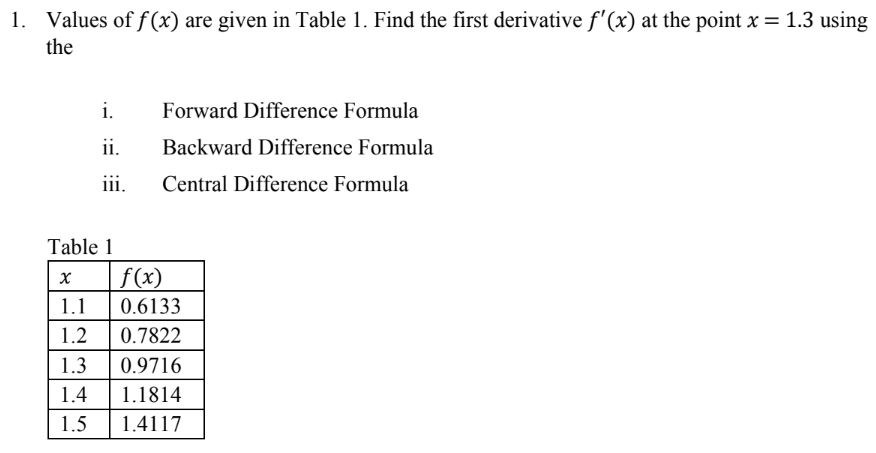

In [25]:
# Given data from the table
x_values = [1.1, 1.2, 1.3, 1.4, 1.5]
f_values = [0.6133, 0.7822, 0.9716, 1.1814, 1.4117]

# Point of interest
x = 1.3
h = 0.1  # Step size

# Find the index of x = 1.3
index = x_values.index(x)

# i. Forward Difference Formula
f_prime_forward = (f_values[index + 1] - f_values[index]) / h

# ii. Backward Difference Formula
f_prime_backward = (f_values[index] - f_values[index - 1]) / h

# iii. Central Difference Formula
f_prime_central = (f_values[index + 1] - f_values[index - 1]) / (2 * h)

# Output the results
print(f"Forward Difference Formula: f'(1.3) = {f_prime_forward:.4f}")
print(f"Backward Difference Formula: f'(1.3) = {f_prime_backward:.4f}")
print(f"Central Difference Formula: f'(1.3) = {f_prime_central:.4f}")

Forward Difference Formula: f'(1.3) = 2.0980
Backward Difference Formula: f'(1.3) = 1.8940
Central Difference Formula: f'(1.3) = 1.9960


## Question 2

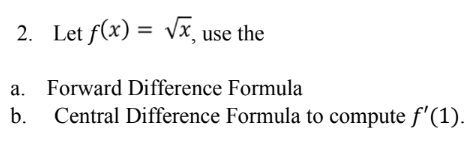


In [26]:
formula_str = 'x**1/2'  # formula: f(x) = x**1/2
x_value = 1  # The point at which we want to compute the derivative

# Calculate derivatives using the three methods
derivatives = calculate_derivatives(formula_str, x_value, h=0.1)

# Print results
for method, value in derivatives.items():
    print(f"{method}: f'({x_value}) = {value:.4f}")

Forward Difference: f'(1) = 0.5000
Backward Difference: f'(1) = 0.5000
Central Difference: f'(1) = 0.5000


## Question 3
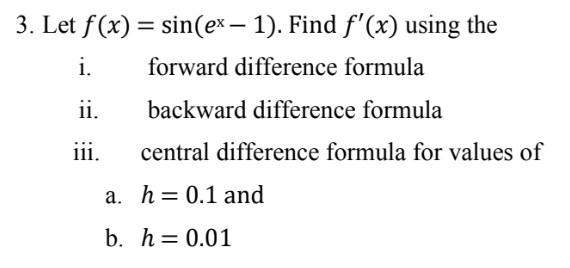

In [27]:
# Formula string to compute f(x) = sin(e^x - 1)
formula_str = 'sin(exp(x) - 1)'  # Formula: f(x) = sin(e^x - 1)
x_value = 1  # The point at which we want to compute the derivative

# Calculate derivatives using the three methods
derivatives = calculate_derivatives(formula_str, x_value, 0.1)
derivatives1 = calculate_derivatives(formula_str, x_value, 0.01)

print('h = 0.1\n---------------')
# Print results
for method, value in derivatives.items():
    print(f"{method}: f'({x_value}) = {value:.4f}")

print('\nh = 0.01\n---------------')
# Print results
for method, value in derivatives1.items():
    print(f"{method}: f'({x_value}) = {value:.4f}")

h = 0.1
---------------
Forward Difference: f'(1) = -0.8159
Backward Difference: f'(1) = -0.0468
Central Difference: f'(1) = -0.4313

h = 0.01
---------------
Forward Difference: f'(1) = -0.4383
Backward Difference: f'(1) = -0.3612
Central Difference: f'(1) = -0.3998


## Question 4
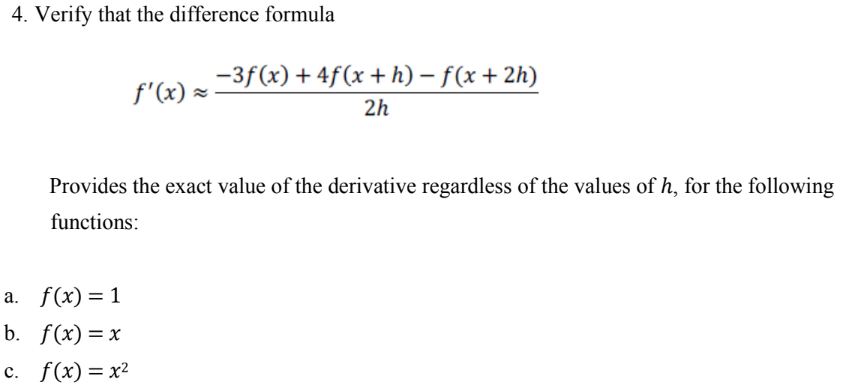

In [28]:
# The difference formula we are verifying
def difference_formula(f, x, h):
    """
    The custom difference formula:
    f'(x) ≈ (-3f(x) + 4f(x+h) - f(x+2h)) / (2h)
    """
    return (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)

# Define the test functions
def f1(x):
    return 1  # f(x) = 1

def f2(x):
    return x  # f(x) = x

def f3(x):
    return x**2  # f(x) = x^2

# Derivative values for verification
def exact_derivative(f, x):
    """
    Exact derivative for comparison.
    """
    if f == f1:
        return 0  # Exact derivative of f(x) = 1 is 0
    elif f == f2:
        return 1  # Exact derivative of f(x) = x is 1
    elif f == f3:
        return 2 * x  # Exact derivative of f(x) = x^2 is 2x
    return None

# Test values
x_value = 1  # Can test for any x value
h_values = [0.1, 0.01, 0.001]  # Different step sizes for better accuracy

# Perform tests
for h in h_values:
    print(f"\nTesting with h = {h}:")
    for f in [f1, f2, f3]:
        approx_derivative = difference_formula(f, x_value, h)
        exact_value = exact_derivative(f, x_value)
        print(f"Function: {f.__name__}, Approximated Derivative: {approx_derivative:.4f}, Exact Derivative: {exact_value:.4f}")



Testing with h = 0.1:
Function: f1, Approximated Derivative: 0.0000, Exact Derivative: 0.0000
Function: f2, Approximated Derivative: 1.0000, Exact Derivative: 1.0000
Function: f3, Approximated Derivative: 2.0000, Exact Derivative: 2.0000

Testing with h = 0.01:
Function: f1, Approximated Derivative: 0.0000, Exact Derivative: 0.0000
Function: f2, Approximated Derivative: 1.0000, Exact Derivative: 1.0000
Function: f3, Approximated Derivative: 2.0000, Exact Derivative: 2.0000

Testing with h = 0.001:
Function: f1, Approximated Derivative: 0.0000, Exact Derivative: 0.0000
Function: f2, Approximated Derivative: 1.0000, Exact Derivative: 1.0000
Function: f3, Approximated Derivative: 2.0000, Exact Derivative: 2.0000


## Question 5 + Question 6
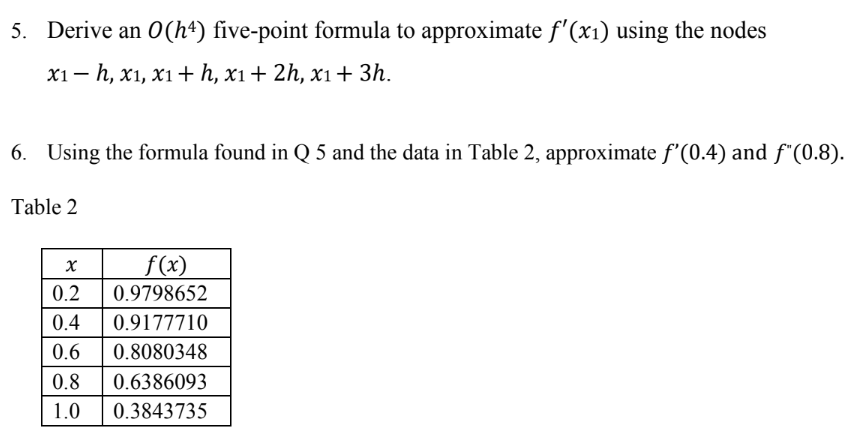

In [29]:
import numpy as np

# Function to approximate f'(x) using the five-point formula (O(h^4))
def five_point_formula(f, x, h):
    """
    Approximates the first derivative using the five-point formula:
    f'(x1) ≈ (-f(x1 - 2h) + 8f(x1 - h) - 8f(x1 + h) + f(x1 + 2h)) / (6h)
    """
    return (-f(x - 2*h) + 8*f(x - h) - 8*f(x + h) + f(x + 2*h)) / (6*h)

# Function to approximate f''(x) using the second derivative formula
def second_derivative(f, x, h):
    """
    Approximates the second derivative using the second-order central difference formula:
    f''(x1) ≈ (f(x1 + h) - 2f(x1) + f(x1 - h)) / h^2
    """
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)

# Define the function values for table data (using interpolation if necessary)
def f(x):
    # Values based on Table 2 (given data)
    table = {0.2: 0.9798652, 0.4: 0.9177710, 0.6: 0.8080348, 0.8: 0.6386093, 1.0: 0.3843735}

    # Linear interpolation for values between the points
    if x in table:
        return table[x]

    # If x is not directly available, use linear interpolation to find the value
    x_vals = np.array(list(table.keys()))
    y_vals = np.array(list(table.values()))

    # Perform linear interpolation
    return np.interp(x, x_vals, y_vals)

# Set step size h
h = 0.2

# Approximate f'(0.4)
x1 = 0.4
f_prime_0_4 = five_point_formula(f, x1, h)

# Approximate f''(0.8)
x2 = 0.8
f_double_prime_0_8 = second_derivative(f, x2, h)

# Print the results
print(f"Approximated f'(0.4) = {f_prime_0_4:.4f}")
print(f"Approximated f''(0.8) = {f_double_prime_0_8:.4f}")


Approximated f'(0.4) = 0.8612
Approximated f''(0.8) = -2.1203
